In [4]:
import numpy as np
import scipy as sci
import visualizations as vis
from DelayEmbedding import optimizedDE as DE
from simulator import networks
from simulator import helpers as sim_helpers
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import os
import scipy.interpolate as interpolate

### RNN Simulation

In [5]:
N = 10
g = 10
J = sci.stats.cauchy.rvs(loc=0,scale=g/N,size=(N,N))
b = sci.stats.cauchy.rvs(loc=0,scale=g/N,size=N)

In [6]:
def Sigmoid(X,scale,loc):
    return 1/(1+np.exp(-(X-loc)/scale))


def SimulateRNN(T,N,J,lam=1,b=None,X0=None,dt = 0.1):
    t_eval = np.linspace(0,T,int(T/dt))
    if X0 is None:
        X0 = np.random.uniform(0,1,N)
    if b is None:
        b = np.zeros(N)
    
    def Diff(t,X):
        return -lam*X+10*np.tanh(J@X+b)
    
    sol = integrate.solve_ivp(Diff,t_span=[0,T],y0=X0,t_eval=t_eval)
    return sol.t,sol.y

In [7]:
N = 50
g = 5
J = sci.stats.norm.rvs(loc=0,scale=g/N,size=(N,N))
t,x = SimulateRNN(1000,N,J)

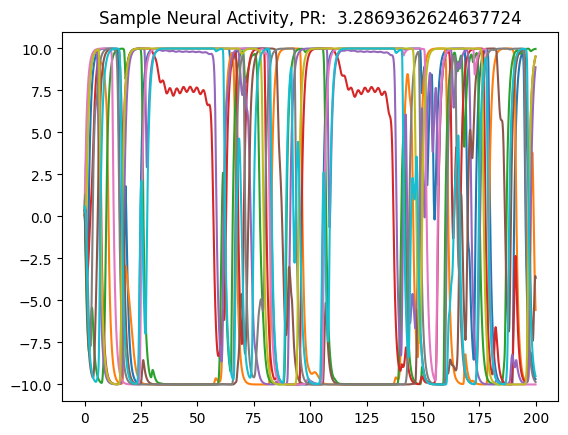

In [8]:
plot_len = 2000
plt.plot(t[:plot_len],x.T[:plot_len,:10])
plt.title(f'Sample Neural Activity, PR:  {np.trace(np.corrcoef(x))**2/np.trace(np.corrcoef(x)@np.corrcoef(x))}')
plt.show()

In [12]:
lyuponovs = np.nanmean(np.diff(x.T[:plot_len,:],axis=0)**2,axis=0)
print(f'lyuponov spectrum: \n {lyuponovs}')

lyuponov spectrum: 
 [0.09209811 0.09160869 0.08956968 0.10392736 0.10133066 0.05382387
 0.05990434 0.08909443 0.06118878 0.15420316 0.15594467 0.0964402
 0.11070493 0.04947269 0.04548183 0.06984402 0.1238506  0.09608108
 0.10059722 0.0693101  0.06002587 0.07421752 0.06213245 0.09593354
 0.12018748 0.11755165 0.13758031 0.14307092 0.10431157 0.10443879
 0.1426133  0.10311319 0.03785936 0.08603075 0.1449496  0.11943055
 0.11868646 0.06883362 0.10344283 0.12871427 0.05428573 0.09341787
 0.06578272 0.08207737 0.08270286 0.0927252  0.12429697 0.08553807
 0.10359513 0.08924952]


### Parameters for CCM

Your performance may vary based on the size of the system and your computing power

In [13]:
recorded_neurons = N
embedding_max_dim = int(3*int(np.sqrt(N)))
delay = 0
kfolds = 5
surr_num = 20
MAX_PROCESSES = 64
out_path= './outputs/RNN6/'
lag_arr = np.arange(-20,21)

In [331]:
if not os.path.exists(out_path):
    os.mkdir(out_path)

In [332]:
np.save(out_path+'TS.npy',x)
np.save(out_path+'t.npy',t)
np.save(out_path+'J.npy',J)

In [19]:
x = np.load(out_path+'TS.npy')
t = np.load(out_path+'t.npy')
J = np.load(out_path+'J.npy')

In [6]:
DE.ParallelFullECCM(x.T[:,:recorded_neurons],d_min=2,dim_max=embedding_max_dim,kfolds=kfolds,delay=delay,n_surrogates=surr_num,lags=lag_arr,
                    node_ratio=0.99,compute_pvalue=True,normal_pval=True,save_path=out_path,save=True,find_optimum_dims=True)

Finding Optimum Delay


Mutual Information: 100%|██████████| 50/50 [00:00<00:00, 968.21it/s]

[1. 1. 1. 4. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1.]
Using Delay: 1


Hub Rankings: 
 channels: [15 22 43 39 16  6 12  2 47  5 20 40 42 29 18 37 31 13 26  7 23 33 11 19
  3 27 25 32  4 28  8 14 49  0 21 24 36 35 44  9 48 17 30 41 38  1 46 10
 45 34] 
 values:   [301.51562861 301.51293068 300.14997212 299.97099268 298.48797981
 298.09085744 297.90941947 295.36848163 295.13738274 293.96998245
 293.63348942 292.79501477 292.61456913 292.35167586 290.17457445
 290.12504243 289.19595914 288.74810982 288.28924269 288.22877333
 287.94087359 287.91491948 287.8553952  287.40538979 287.1336991
 286.76791786 286.40481974 286.23340971 286.05962062 283.32588412
 283.10937162 279.46538451 279.31285153 278.48514671 278.46287619
 276.14229233 275.97038508 272.84375535 271.10843584 266.20586916
 265.14191989 260.32357468 260.0590286  257.89422574 256.85291305
 256.74860528 256.12556562 253.66339763 246.4252699  225.86004779]
Hubs to be computed on: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

FCF for 39: 100%|██████████| 250/250 [05:09<00:00,  1.24s/it]


shape x: (4,), shape y: (2500, 4)
(2500,)
Computing CCM for dims: [ 3 20 38] and 2500 pairs


FCF for 38: 100%|██████████| 250/250 [05:03<00:00,  1.22s/it]


shape x: (7,), shape y: (2500, 7)
(2500,)
Computing CCM for dims: [ 4 22 37] and 2500 pairs


FCF for 37: 100%|██████████| 250/250 [04:59<00:00,  1.20s/it]


shape x: (10,), shape y: (2500, 10)
(2500,)
Computing CCM for dims: [ 5 19 36] and 2500 pairs


FCF for 36: 100%|██████████| 250/250 [04:49<00:00,  1.16s/it]


shape x: (13,), shape y: (2500, 13)
(2500,)
Computing CCM for dims: [ 6 23 35] and 2500 pairs


FCF for 35: 100%|██████████| 250/250 [04:43<00:00,  1.13s/it]


shape x: (16,), shape y: (2500, 16)
(2500,)
Computing CCM for dims: [ 7 18 34] and 2500 pairs


FCF for 34: 100%|██████████| 250/250 [04:38<00:00,  1.12s/it]


shape x: (19,), shape y: (2500, 19)
(2500,)
Computing CCM for dims: [ 8 24 33] and 2500 pairs


FCF for 33: 100%|██████████| 250/250 [04:34<00:00,  1.10s/it]


shape x: (22,), shape y: (2500, 22)
(2500,)
Computing CCM for dims: [ 9 17 32] and 2500 pairs


FCF for 32: 100%|██████████| 250/250 [04:21<00:00,  1.04s/it]


shape x: (25,), shape y: (2500, 25)
(2500,)
Computing CCM for dims: [10 25 31] and 2500 pairs


FCF for 31: 100%|██████████| 250/250 [04:13<00:00,  1.01s/it]


shape x: (28,), shape y: (2500, 28)
(2500,)
Computing CCM for dims: [11 16 30] and 2500 pairs


FCF for 30: 100%|██████████| 250/250 [04:07<00:00,  1.01it/s]


shape x: (31,), shape y: (2500, 31)
(2500,)
Computing CCM for dims: [12 26 29] and 2500 pairs


FCF for 29: 100%|██████████| 250/250 [04:02<00:00,  1.03it/s]


shape x: (34,), shape y: (2500, 34)
(2500,)
Computing CCM for dims: [13 15 28] and 2500 pairs


FCF for 28: 100%|██████████| 250/250 [03:51<00:00,  1.08it/s]


shape x: (37,), shape y: (2500, 37)
(2500,)
Computing CCM for dims: [14 27] and 2500 pairs


FCF for 27: 100%|██████████| 250/250 [03:46<00:00,  1.10it/s]


shape x: (39,), shape y: (2500, 39)
(2500,)
Still need to compute fcf for pairs: [[ 0  1]
 [ 0  4]
 [ 0  5]
 ...
 [49 44]
 [49 46]
 [49 48]]


Final Reconstructions: 100%|██████████| 4320/4320 [00:32<00:00, 132.45it/s]


Total Time taken: 7443.576948447 s


(array([[[2.29007925, 2.31995215, 2.35153957, ..., 2.45132084,
          2.42209967, 2.39406648],
         [2.28109166, 2.30005455, 2.32010711, ..., 2.32115435,
          2.30153942, 2.28290899],
         [2.28870178, 2.31869404, 2.35036406, ..., 2.44758845,
          2.41642266, 2.38665015],
         ...,
         [2.36844499, 2.39387502, 2.42018757, ..., 2.33303926,
          2.3036764 , 2.27598641],
         [2.22150389, 2.2427895 , 2.26560614, ..., 2.40074319,
          2.37790016, 2.35601514],
         [2.34486048, 2.3771189 , 2.41080177, ..., 2.42693409,
          2.39604437, 2.3665178 ]],
 
        [[2.2987269 , 2.32576104, 2.35435718, ..., 2.44397437,
          2.41810697, 2.39315211],
         [2.34614889, 2.36971366, 2.39462896, ..., 2.32716347,
          2.30297882, 2.28020693],
         [2.30940522, 2.33816523, 2.3686145 , ..., 2.42057515,
          2.39293594, 2.36634987],
         ...,
         [2.37605283, 2.40216971, 2.4293229 , ..., 2.32777368,
          2.29858973, 2.

In [14]:
eCCM = np.load(out_path+'all_computed_fcfs.npy')
eCCM_Max = np.load(out_path+'eFCFTensorXValidated_dim40_delay1.npy')
surr_dist = np.load(out_path+'surrogate_fcf.npy')
dims = np.load(out_path+'current_optimum_dimensions.npy')
lags = np.load(out_path+'lags.npy')
pvals = np.load(out_path+'maxdim_pvalues.npy')
zero_lag = np.nanargmin(np.abs(lags))

In [15]:
kfolded_CCM = np.nanmean(eCCM,axis=0)

In [16]:
flat_surrs = surr_dist.reshape(-1,*surr_dist.shape[2:])[:,:,:,0]

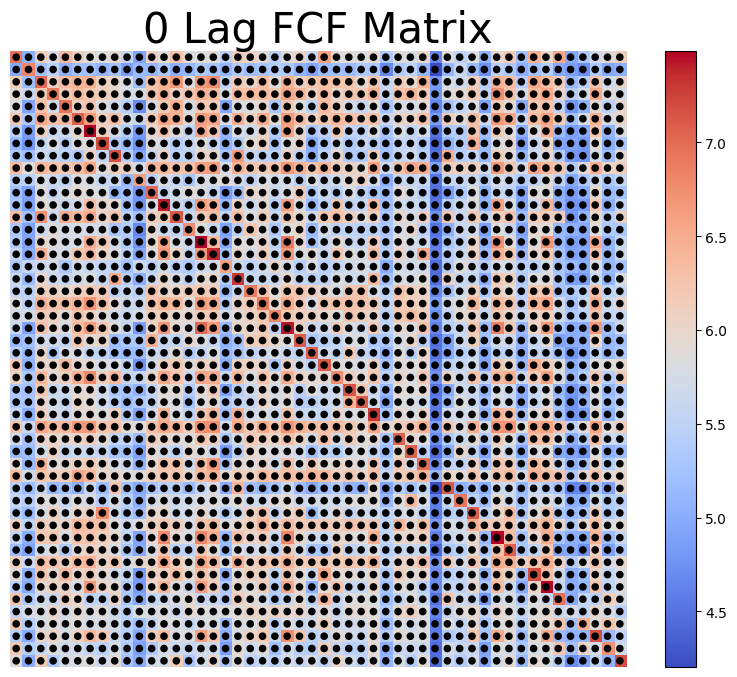

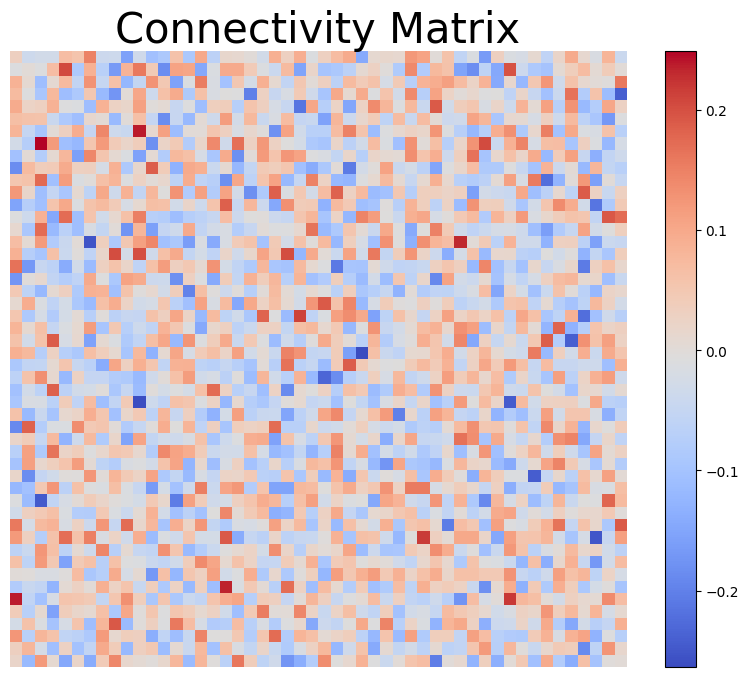

In [21]:
vis.visualize_matrix(np.nanmean(eCCM_Max[:,:,:,zero_lag],axis=0), pval=(pvals[:,:,zero_lag]< 0.01), titlestr='0 Lag FCF Matrix')
vis.visualize_matrix(J[:,:], titlestr= 'Connectivity Matrix')

In [25]:
def Complexity(X,Y,threshold=0.95,smoothing=0):
    spl_rep = interpolate.splrep(X,Y,s=smoothing)
    Y_S = interpolate.splev(X,spl_rep,der=0)
    max_Y = np.nanmax(Y_S)
    comp = -1
    for i in range(Y.shape[0]):
        if Y_S[i] >= threshold*max_Y:
            comp = i
            break
    return X[comp],Y[comp],Y_S[comp]

def FullComplexity(dims,trial_FCFs, thresh = 0.95):
    var_num = trial_FCFs.shape[1]
    complexities = np.ones((var_num,var_num))*np.nan
    for i in range(var_num):
        for j in range(var_num):
            nan_indices = np.isnan(trial_FCFs[:,i,j])
            curr_dims = dims[np.logical_not(nan_indices)]
            curr_FCFs = trial_FCFs[np.logical_not(nan_indices),i,j]
            if curr_dims.shape[0] < 1:
                continue
            else:
                comp, comp_val, splined_val = Complexity(curr_dims,curr_FCFs)
                complexities[i,j] = comp
    return complexities
            

In [26]:
def BestDownstreamConnections(CCM):
    copeccm = np.array(CCM)
    for i in range(recorded_neurons):
        copeccm[:,i,i,:] = np.nan
    best_down_cons = np.nanargmax(copeccm,axis=1)
    best_down_ccms = np.nanmax(copeccm,axis=1)
    return best_down_cons, best_down_ccms

In [27]:
def Hubness(CCM,sort_dim = -1,sort_lag = zero_lag):
    copeccm = np.array(CCM)
    for i in range(recorded_neurons):
        copeccm[:,i,i,:] = np.nan
    hubness = np.nanmean(copeccm,axis=1)
    hubsort = np.argsort(-hubness[sort_dim,:,sort_lag])
    return hubness, hubsort

In [28]:
hubness, hubsort = Hubness(kfolded_CCM,sort_dim=26)

In [35]:
def PlotBestConnections(CCM,sort_args,J,plot_lag=zero_lag,plot_dim=-1):
    sorted_CCM = np.transpose(np.array([[CCM[:,sort_args[j],sort_args[i],:] for j in range(len(sort_args))]for i in range(len(sort_args))]),axes=[2,0,1,3])
    best_down_cons,best_down_ccms = BestDownstreamConnections(sorted_CCM)
    sorted_J = np.array([[J[i,j] for j in sort_args] for i in sort_args])
    vis.visualize_matrix(best_down_cons[:,:,plot_lag], titlestr='Hubness Sorted Best Connections')
    vis.visualize_matrix(best_down_ccms[:,:,plot_lag],titlestr='Hubness Sorted Best Connection Strength')
    vis.visualize_matrix(sorted_J,titlestr='Hubness Sorted J')
    plot_CCM = np.array(sorted_CCM[plot_dim,:,:,plot_lag])
    for i in range(recorded_neurons):
        plot_CCM[i,i] = np.nan
    vis.visualize_matrix(plot_CCM,titlestr='Hubness Sorted FCF')
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(J.flatten())
    plt.show()
    fig = plt.figure()
    ax = plt.axes()
    plt.show()


In [53]:
zero_lag_fcf = np.nanmean(eCCM_Max[:,:,:,zero_lag],axis=0)
normalized_zero_lag_fcf = zero_lag_fcf-np.mean(zero_lag_fcf)
normalized_zero_lag_fcf /= (np.max(normalized_zero_lag_fcf)-np.min(normalized_zero_lag_fcf))
normalized_J = J/(np.max(J)-np.min(J))

<Figure size 640x480 with 0 Axes>

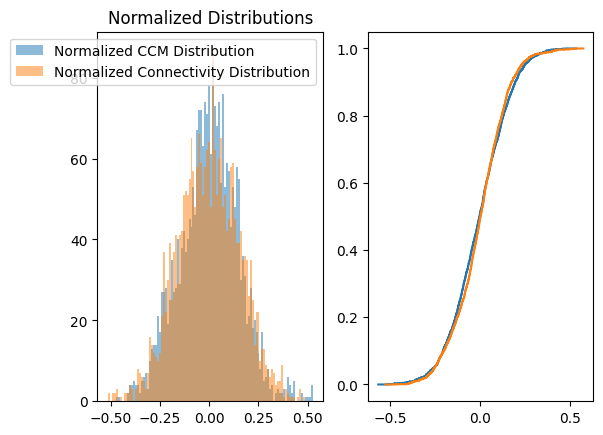

In [66]:
def PlotCCMVsConnectivity(CCM,J_mat):
    zero_lag_fcf = np.nanmean(CCM[:,:,:],axis=0)
    normalized_zero_lag_fcf = zero_lag_fcf-np.mean(zero_lag_fcf)
    normalized_zero_lag_fcf /= (np.max(normalized_zero_lag_fcf)-np.min(normalized_zero_lag_fcf))
    normalized_J = J_mat/(np.max(J_mat)-np.min(J_mat))
    plt.figure()
    fig,ax = plt.subplots(nrows=1,ncols=2)
    ax[0].hist((normalized_zero_lag_fcf).flatten(),bins=100,alpha=0.5,label='Normalized CCM Distribution')
    ax[0].hist(normalized_J.flatten(),bins=100,alpha=0.5,label='Normalized Connectivity Distribution')
    ax[0].set_title('Normalized Distributions')
    ax[0].legend()
    sci.stats.ecdf(normalized_J.flatten()).cdf.plot(ax[1])
    sci.stats.ecdf(normalized_zero_lag_fcf.flatten()).cdf.plot(ax[1])
    plt.show()

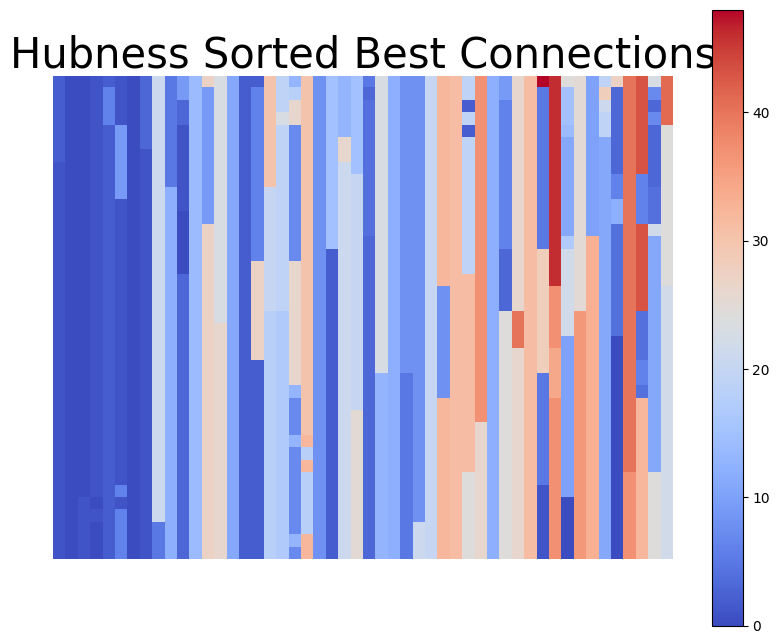

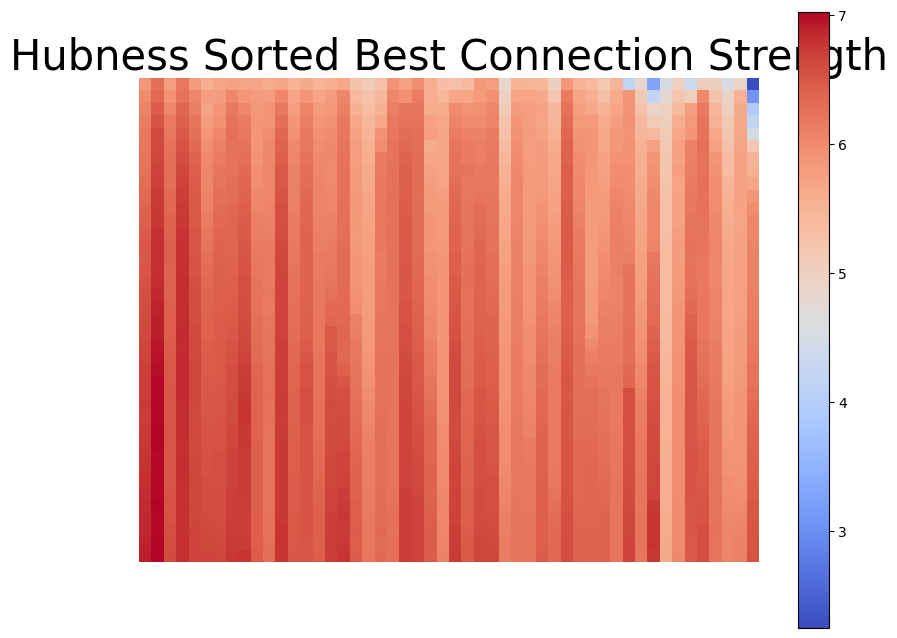

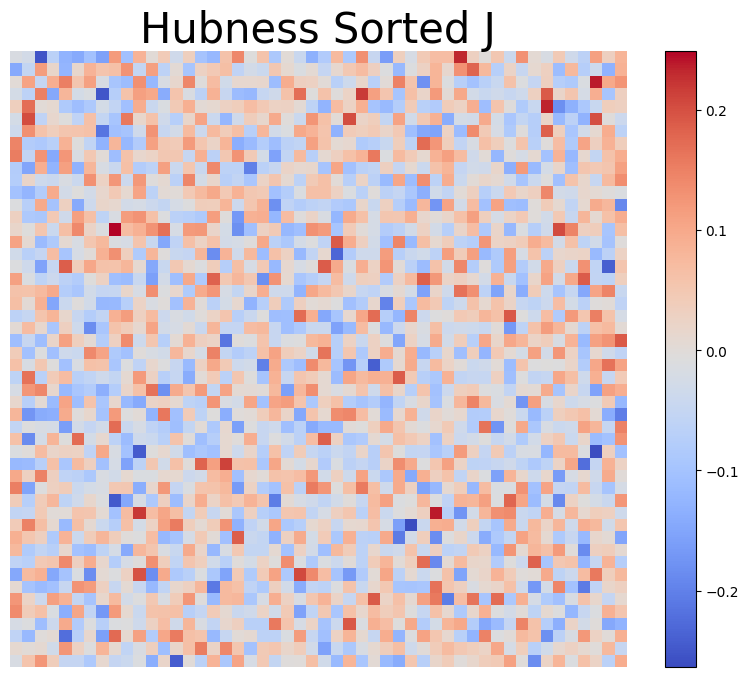

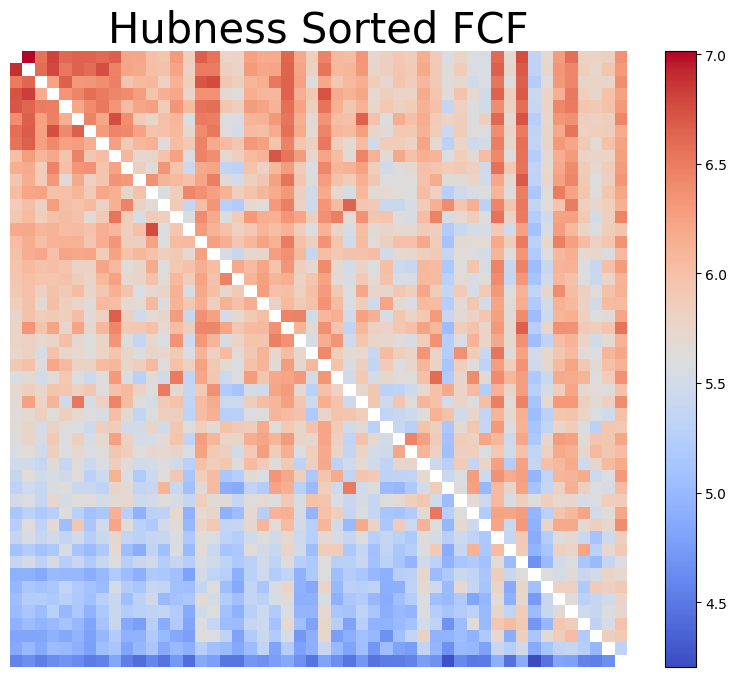

In [36]:
PlotBestConnections(kfolded_CCM,hubsort,J)